In [1]:
import h5py   
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
def load_surf_swarm(fdir,step,KL):
    fname = fdir+"Surface-"+str(step).zfill(0)+".h5"
    fh5   = h5py.File(fname ,'r')  
    fdata = fh5["data"][()]
    xcoord = fdata[:,0]
    ycoord = fdata[:,1]
    return xcoord,ycoord

def load_depth(fdir,maxstep,dstep,KL):
    depth_l = []
    depth_r = []
    for step in range(0,maxstep+1,dstep):
        xcoord,ycoord = load_surf_swarm(fdir,step,KL)
        depth_l.append(ycoord[0])   
        depth_r.append(ycoord[-1])  
    return np.array(depth_l),np.array(depth_r)

In [3]:
fdir1 = "outputs_kaus2010_FreeSlip_0.5ka/"
fdir2 = "outputs_kaus2010_FreeSurface_0.5ka/"
fdir3 = "outputs_kaus2010_FreeSurface_100ka/"

dt1,maxsteps1,dstep1= 5,1100,1
dt2,maxsteps2,dstep2= 5,1100,1
dt3,maxsteps3,dstep3= 100,55,1

def times(dt,maxsteps,dstep):
    times = np.arange(0,dt*maxsteps+dt*dstep/2,dt*dstep)
    return times

times1 = times(dt1,maxsteps1,dstep1)
times2 = times(dt2,maxsteps2,dstep2)
times3 = times(dt3,maxsteps3,dstep3)

KL = 500
depth1_l,depth1_r = load_depth(fdir1,maxsteps1,dstep1,KL)
depth2_l,depth2_r = load_depth(fdir2,maxsteps2,dstep2,KL)
depth3_l,depth3_r = load_depth(fdir3,maxsteps3,dstep3,KL)

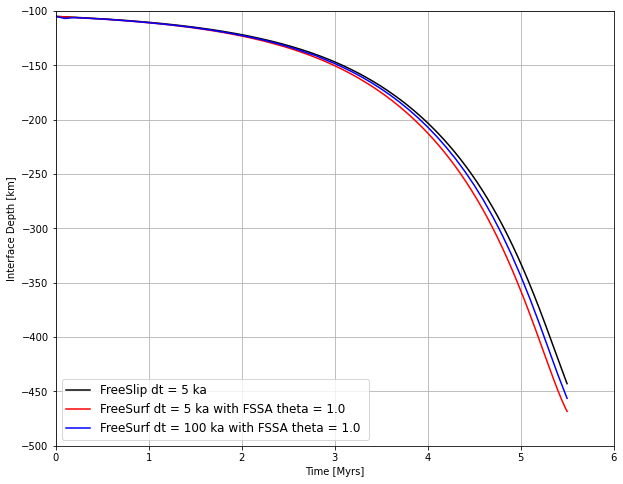

In [4]:
#fname = "Depth of the interface at x=−250km and x=250km versus time for the free surface simulations"
fname = "Depth of the interface at x=−250km versus time for the free surface simulations"
#fnameax1 = "Comparison of the evolution of rms velocity"
#fnameax2 = "Depth of the interface at x=−250km and x=250km versus time for the free surface simulations"
fig, ax1 = plt.subplots(nrows=1, figsize=(10,8))
ax1.set(xlabel='Time [Myrs]', ylabel='Interface Depth [km]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)

ax1.plot(times1/1000,depth1_l,'-k',label= "FreeSlip dt = 5 ka") # - left")
#ax1.plot(times1/1000,depth1_r,'-.k',label= "FreeSlip  dt = 5 ka - right")

ax1.plot(times2/1000,depth2_l,'-r',label= "FreeSurf dt = 5 ka with FSSA theta = 1.0") # - left")
#ax1.plot(times2/1000,depth2_r,'-.r',label= "FreeSurf dt = 5 ka - right")

ax1.plot(times3/1000,depth3_l,'-b',label= "FreeSurf dt = 100 ka with FSSA theta = 1.0 ")# = 1.0 - left")
#ax1.plot(times3/1000,depth3_r,'-.b',label= "FreeSurf dt = 100 ka - right")

ax1.set_ylim([-500,-100])
ax1.set_xlim([0,6.0])
ax1.grid()
ax1.legend(loc = 'lower left',prop = {'size':12})
plt.savefig(fname,dpi=150,bbox_inches='tight')